In [1]:
# numpy
import numpy as np
# pandas
import pandas as pd
# pyplot
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns

In [10]:
# import tips dataset from seaborn
tips = sns.load_dataset("tips")

In [11]:
sns.set(color_codes=True)

# Exploratory Analysis

The head function allows for a peak at the dataset. We can see categorical (sex, smoker, day, and time) as well as numerical (total_bill, tip, size) data. We can infer from this snapshot that there are potential correlations between the the customer's tip and the other variables.

In [12]:
# head of tips dataset displaying first 5 rows of dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [14]:
# Description of dataset
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Plotting the Dataset

## Section 1: Total Bill

### Distribution of total bill and tip

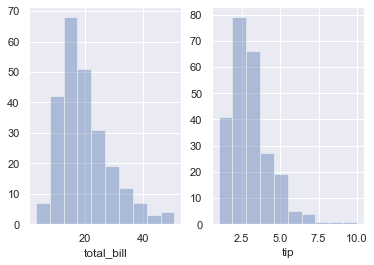

In [58]:
# histogram of total bill and tips side by side
plt.subplot(1,2,1)
sns.distplot(tips['total_bill'], kde=False, bins=10);

plt.subplot(1,2,2)
sns.distplot(tips['tip'], kde=False, bins=10);

### Scatterplot

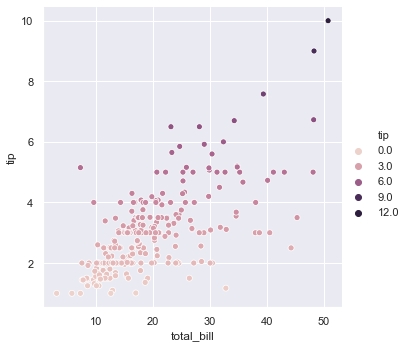

In [61]:
sns.relplot(x="total_bill", y="tip", hue="tip", data=tips);

## Smoker vs. Non-smoker

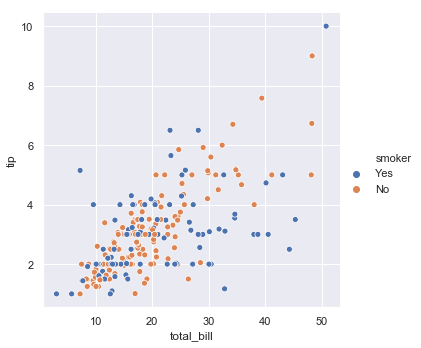

In [18]:
# Scatterplot of 3 dimensions of data, total bill, tip, and whether the customer was a smoker 
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

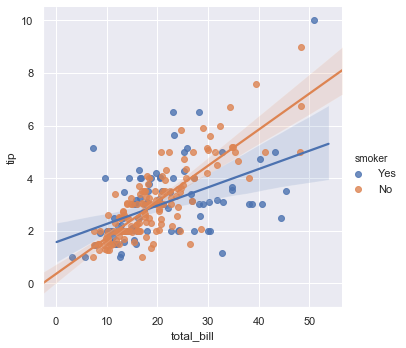

In [75]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

## Party Size

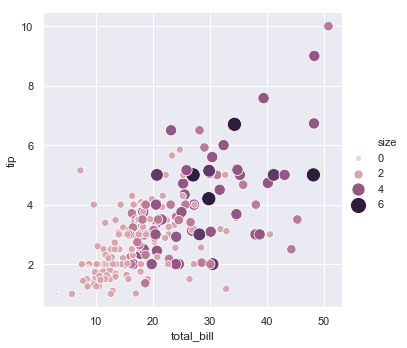

In [22]:
# Scatterplot with part size as third dimension
sns.relplot(x="total_bill", y="tip", hue="size", size="size", sizes=(15, 200), data=tips);

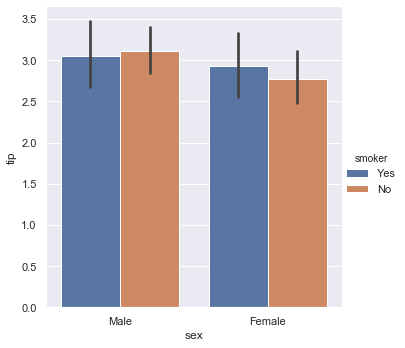

In [67]:
# Bar chart of male and female tips differenciating between smoker and non-smoker
sns.catplot(x="sex", y="tip", hue="smoker", kind=("bar"), data=tips);

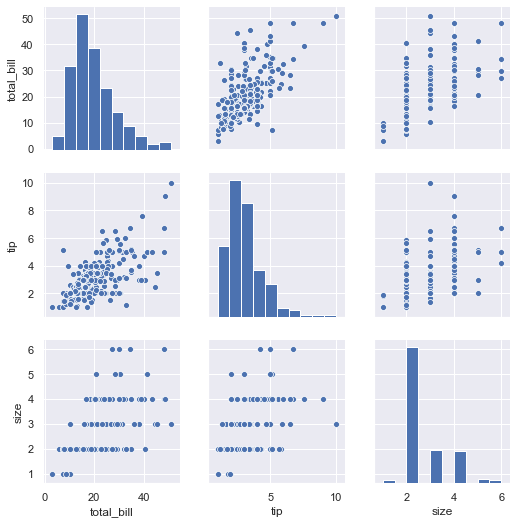

In [74]:
sns.pairplot(tips);